## Importing necesary python libraries and modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer,SimpleImputer
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss

from collections import Counter

## Reading csv file into dataframe

In [2]:
df = pd.read_csv('Uterine Corpus Endometrial Carcinoma.csv')

# INITIAL EXPLORATION

## Checking first rows of the dataset

In [3]:
df.head()

,Patient ID,Sample ID,Cancer Type Detailed,Overall Survival Status,Disease Free Status,Disease-specific Survival status,Mutation Count,Fraction Genome Altered,Diagnosis Age,MSI MANTIS Score,MSIsensor Score,Race Category,Subtype,Tumor Type
0,TCGA-2E-A9G8,TCGA-2E-A9G8-01,Uterine Endometrioid Carcinoma,0:LIVING,NaN,0:ALIVE OR DEAD TUMOR FREE,65.0,0.3311,59.0,0.3234,0.85,Black or African American,UCEC_CN_HIGH,Endometrioid Endometrial Adenocarcinoma
1,TCGA-4E-A92E,TCGA-4E-A92E-01,Uterine Endometrioid Carcinoma,0:LIVING,0:DiseaseFree,0:ALIVE OR DEAD TUMOR FREE,147.0,0.0341,54.0,0.3396,0.01,Black or African American,UCEC_CN_LOW,Endometrioid Endometrial Adenocarcinoma
2,TCGA-5B-A90C,TCGA-5B-A90C-01,Uterine Endometrioid Carcinoma,0:LIVING,NaN,0:ALIVE OR DEAD TUMOR FREE,45.0,0.6903,69.0,0.3344,0.55,Black or African American,UCEC_CN_HIGH,Endometrioid Endometrial Adenocarcinoma
3,TCGA-5S-A9Q8,TCGA-5S-A9Q8-01,Uterine Endometrioid Carcinoma,0:LIVING,0:DiseaseFree,0:ALIVE OR DEAD TUMOR FREE,50.0,0.0581,51.0,0.3199,0.09,Black or African American,UCEC_CN_LOW,Endometrioid Endometrial Adenocarcinoma
4,TCGA-A5-A0G1,TCGA-A5-A0G1-01,Uterine Serous Carcinoma/Uterine Papillary Ser...,1:DECEASED,0:DiseaseFree,0:ALIVE OR DEAD TUMOR FREE,10808.0,0.0001,67.0,0.3108,1.74,White,UCEC_POLE,Serous Endometrial Adenocarcinoma


## Checking number of rows and columns

In [4]:
df.shape

(529, 14)

## Checking  column datatypes and count of null values

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 529 entries, 0 to 528
Data columns (total 14 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Patient ID                        529 non-null    object 
 1   Sample ID                         529 non-null    object 
 2   Cancer Type Detailed              529 non-null    object 
 3   Overall Survival Status           529 non-null    object 
 4   Disease Free Status               414 non-null    object 
 5   Disease-specific Survival status  527 non-null    object 
 6   Mutation Count                    515 non-null    float64
 7   Fraction Genome Altered           519 non-null    float64
 8   Diagnosis Age                     526 non-null    float64
 9   MSI MANTIS Score                  526 non-null    float64
 10  MSIsensor Score                   528 non-null    float64
 11  Race Category                     497 non-null    object 
 12  Subtype 

## Summary statistics of numerical features

In [6]:
df.describe()

,Mutation Count,Fraction Genome Altered,Diagnosis Age,MSI MANTIS Score,MSIsensor Score
count,515.000000,519.000000,526.00000,526.000000,528.000000
mean,1046.423301,0.185959,63.76616,0.438948,6.395890
std,2734.365494,0.226088,11.06003,0.239666,10.175853
min,7.000000,0.000000,31.00000,0.237000,0.000000
25%,47.000000,0.003600,57.00000,0.283950,0.110000
50%,76.000000,0.067800,64.00000,0.311300,0.435000
75%,563.500000,0.314450,71.00000,0.543225,10.117500
max,25696.000000,0.948700,90.00000,1.304900,40.430000


## Removing unwanted features

In [7]:
final_df = df.drop(['Patient ID', 'Sample ID', 'Cancer Type Detailed', 'Race Category'], axis=1)

## Renaming columns

In [8]:
final_df.rename(columns={'Tumor Type' :'Tumor Hystopathological classification', 'Subtype' : 'Tumor Molecular classification'}, inplace=True)

## Changing the order of df columns

In [9]:
final_df = final_df[['Tumor Hystopathological classification', 'Tumor Molecular classification', 'Diagnosis Age', 'MSI MANTIS Score', 'MSIsensor Score', 'Mutation Count', 'Fraction Genome Altered', 'Overall Survival Status', 'Disease Free Status', 'Disease-specific Survival status']]

In [10]:
final_df

,Tumor Hystopathological classification,Tumor Molecular classification,Diagnosis Age,MSI MANTIS Score,MSIsensor Score,Mutation Count,Fraction Genome Altered,Overall Survival Status,Disease Free Status,Disease-specific Survival status
0,Endometrioid Endometrial Adenocarcinoma,UCEC_CN_HIGH,59.0,0.3234,0.85,65.0,0.3311,0:LIVING,NaN,0:ALIVE OR DEAD TUMOR FREE
1,Endometrioid Endometrial Adenocarcinoma,UCEC_CN_LOW,54.0,0.3396,0.01,147.0,0.0341,0:LIVING,0:DiseaseFree,0:ALIVE OR DEAD TUMOR FREE
2,Endometrioid Endometrial Adenocarcinoma,UCEC_CN_HIGH,69.0,0.3344,0.55,45.0,0.6903,0:LIVING,NaN,0:ALIVE OR DEAD TUMOR FREE
3,Endometrioid Endometrial Adenocarcinoma,UCEC_CN_LOW,51.0,0.3199,0.09,50.0,0.0581,0:LIVING,0:DiseaseFree,0:ALIVE OR DEAD TUMOR FREE
4,Serous Endometrial Adenocarcinoma,UCEC_POLE,67.0,0.3108,1.74,10808.0,0.0001,1:DECEASED,0:DiseaseFree,0:ALIVE OR DEAD TUMOR FREE
...,...,...,...,...,...,...,...,...,...,...
524,Serous Endometrial Adenocarcinoma,UCEC_CN_HIGH,85.0,0.3647,0.15,63.0,0.6549,1:DECEASED,NaN,1:DEAD WITH TUMOR
525,Endometrioid Endometrial Adenocarcinoma,UCEC_MSI,64.0,0.6138,14.35,1306.0,0.0275,0:LIVING,0:DiseaseFree,0:ALIVE OR DEAD TUMOR FREE
526,Endometrioid Endometrial Adenocarcinoma,UCEC_CN_LOW,61.0,0.3382,0.00,56.0,0.0466,0:LIVING,0:DiseaseFree,0:ALIVE OR DEAD TUMOR FREE
527,Endometrioid Endometrial Adenocarcinoma,UCEC_CN_HIGH,73.0,0.3503,0.03,48.0,0.4226,0:LIVING,NaN,0:ALIVE OR DEAD TUMOR FREE


## Exploring distribution of numerical features

In [11]:
num_features = final_df.select_dtypes(exclude='object').columns

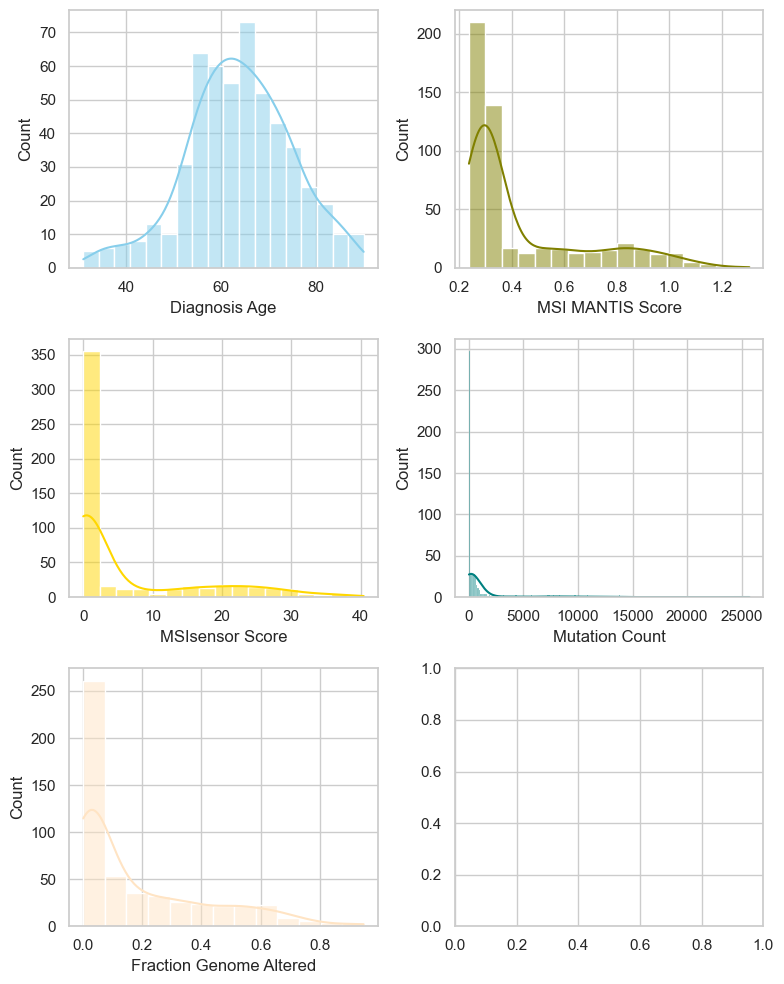

In [12]:

sns.set(style="whitegrid")  

fig,axs = plt.subplots(3,2, figsize = (8, 10))

sns.histplot(data=final_df, x=num_features[0], kde=True, color="skyblue", ax=axs[0, 0])

sns.histplot(data=final_df, x=num_features[1], kde=True, color="olive", ax=axs[0, 1])

sns.histplot(data=final_df, x=num_features[2], kde=True, color="gold", ax=axs[1, 0])

sns.histplot(data=final_df, x=num_features[3], kde=True, color="teal", ax=axs[1, 1])

sns.histplot(data=final_df, x=num_features[4], kde=True, color="bisque", ax=axs[2, 0])

fig.tight_layout()

plt.show()

# DATA CLEANING

## CHECKING FOR NAN VALUES

In [13]:
final_df.isna().sum()

Tumor Hystopathological classification      0
Tumor Molecular classification             22
Diagnosis Age                               3
MSI MANTIS Score                            3
MSIsensor Score                             1
Mutation Count                             14
Fraction Genome Altered                    10
Overall Survival Status                     0
Disease Free Status                       115
Disease-specific Survival status            2
dtype: int64

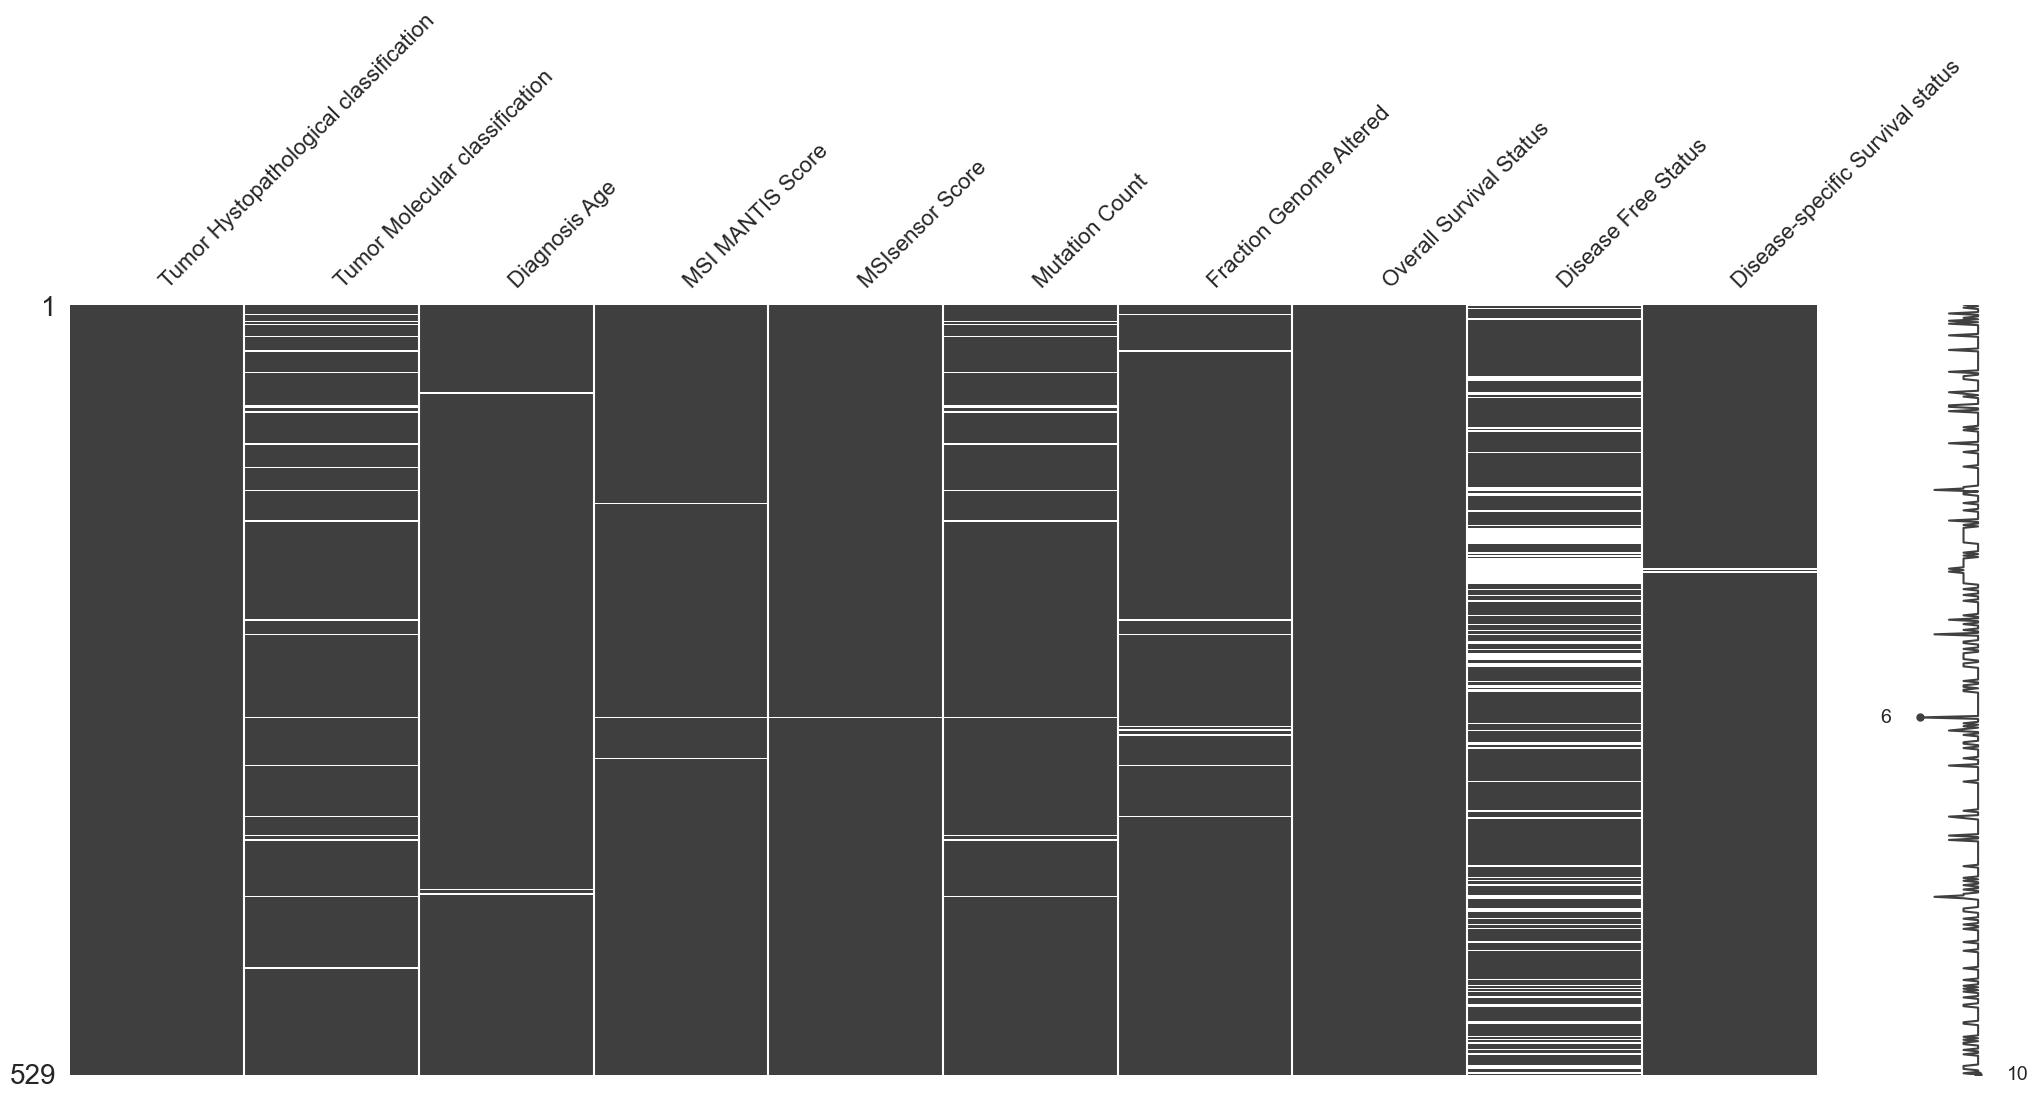

In [14]:
msno.matrix(final_df)
plt.show()

## HANDLING NA VALUES IN NUMERICAL FEATURES

###  'Diagnosis Age' variable follows a normal distribution, I decided to imput the na values with the mean of the column.

In [15]:

mean_imputer = SimpleImputer(strategy='mean')

final_df['Diagnosis Age'] = mean_imputer.fit_transform(final_df[['Diagnosis Age']])


### ' MSI MANTIS Score' , 'MSIsensor Score', 'Mutation Count', 'Fraction Genome Altered'  showed right skewed distributions, I preferred imputing by the median being more representative

In [16]:

median_imputer = SimpleImputer(strategy='median')

final_df[['MSI MANTIS Score', 'MSIsensor Score', 'Mutation Count', 'Fraction Genome Altered']] = median_imputer.fit_transform(final_df[['MSI MANTIS Score', 'MSIsensor Score', 'Mutation Count', 'Fraction Genome Altered']])


In [17]:
final_df.isna().sum()

Tumor Hystopathological classification      0
Tumor Molecular classification             22
Diagnosis Age                               0
MSI MANTIS Score                            0
MSIsensor Score                             0
Mutation Count                              0
Fraction Genome Altered                     0
Overall Survival Status                     0
Disease Free Status                       115
Disease-specific Survival status            2
dtype: int64

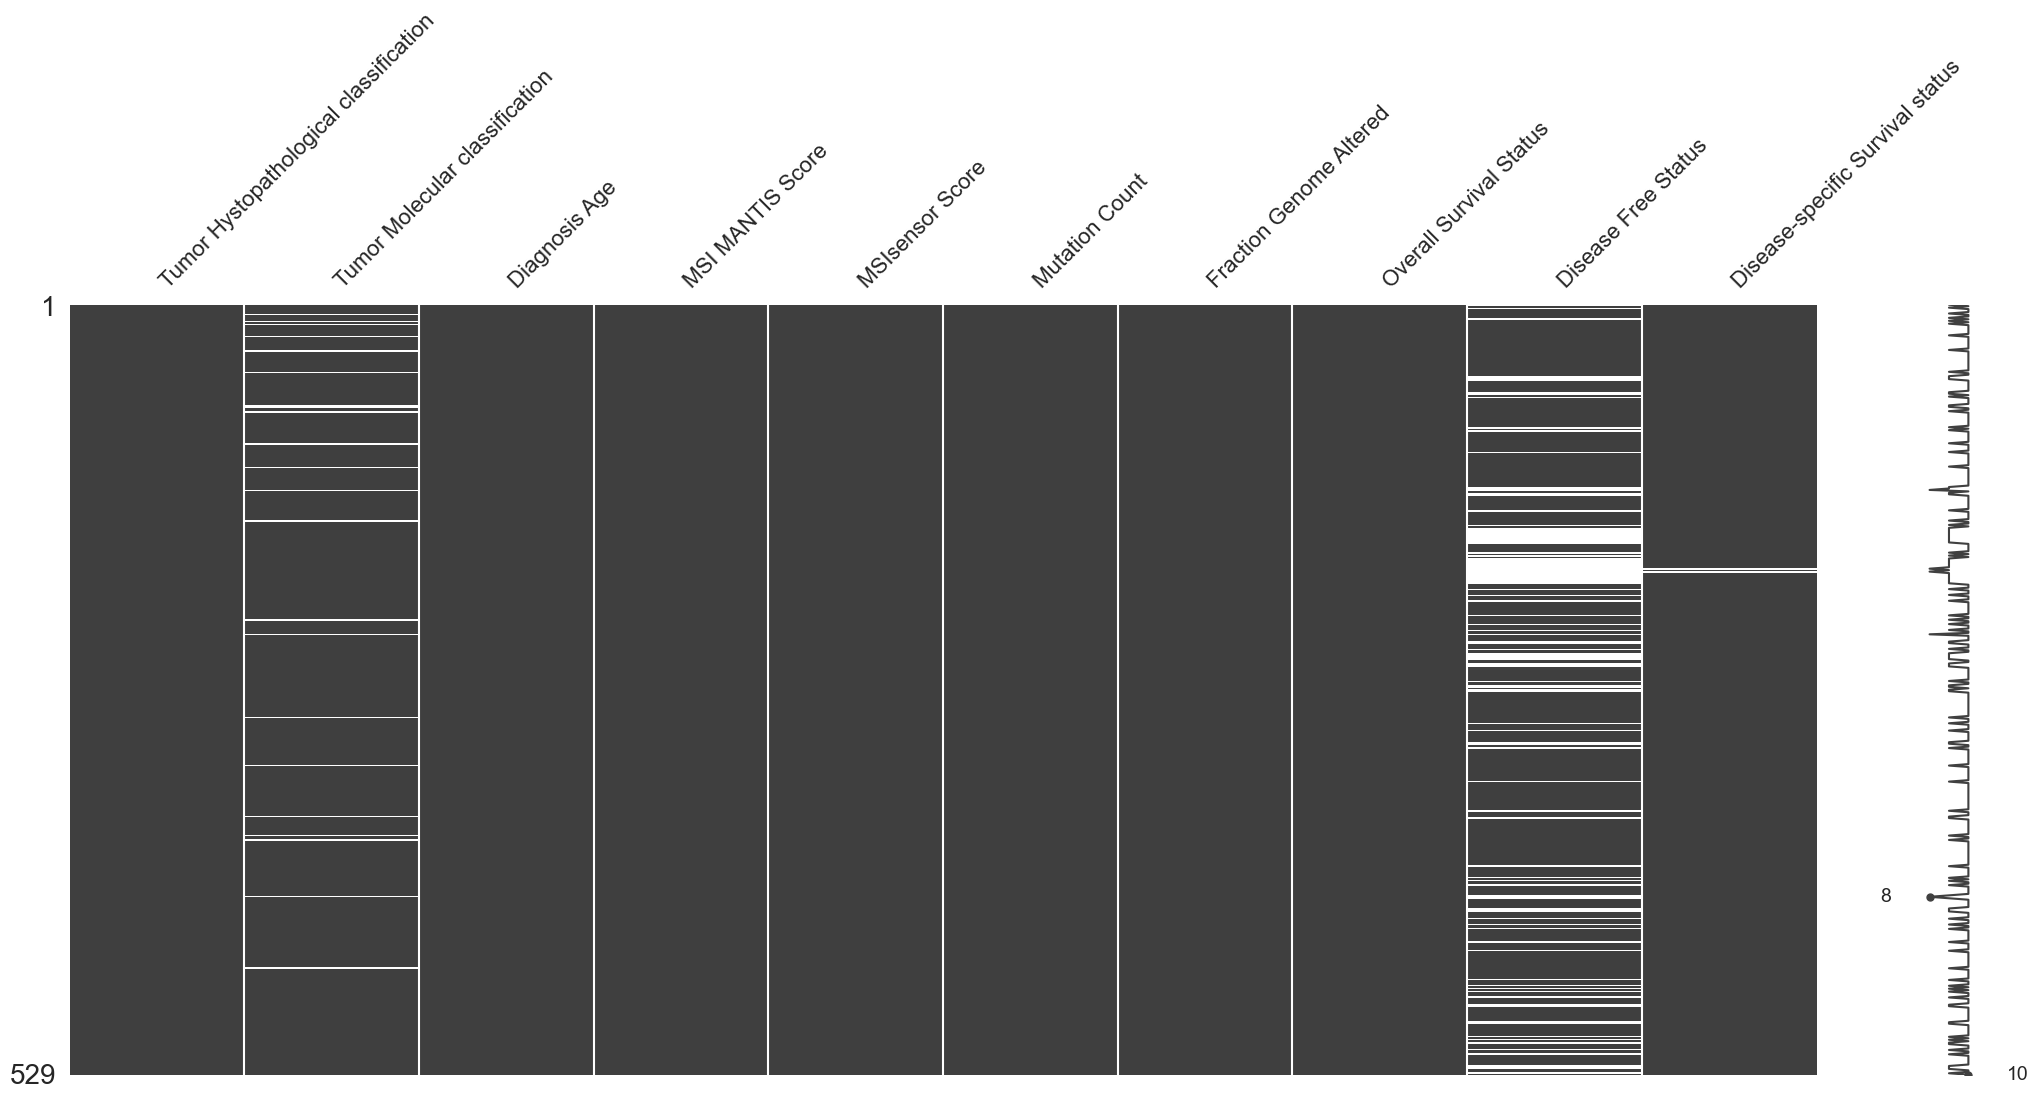

In [18]:
msno.matrix(final_df)
plt.show()

## HANDLING NA VALUES IN CATEGORICAL FEATURES

### Imputing 'Tumor Molecular classification' missing values with IterativeImputer (MICE) technique, based in the 'MSI MANTIS Score', 'MSIsensor index', 'Fraction genome' altered and 'Mutation Count'.

In [19]:
"""Creating a copy of the df and encoding 'Tumor molecular classification' into a numerical variable
'Tumor molecular classification cat' with label encoding to pass to the imputer"""

le_df1 = final_df.copy()

le1 = LabelEncoder()

le1.fit(le_df1['Tumor Molecular classification'])

le_df1['Tumor Molecular classification cat'] = le1.transform(le_df1['Tumor Molecular classification'])

#print(le.classes_)

"""Converting the encoded Nan values to np.nan again"""

le_df1['Tumor Molecular classification cat'] = le_df1['Tumor Molecular classification cat'].apply(lambda x: np.nan if x == 4 else x)

#le_df1['Tumor Molecular classification cat'].unique()

In [20]:
"""Instanciating imputer, fitting , and transforming na values of the imput"""

imputer = IterativeImputer()

X = le_df1[['MSI MANTIS Score', 'MSIsensor Score', 'Mutation Count', 'Fraction Genome Altered', 'Tumor Molecular classification cat']]

X_imputed = imputer.fit_transform(X)

""" Replacing the variable with the nan values imputed with the new subtypes encoded"""

le_df1['Tumor Molecular classification cat']= X_imputed[:, 4].round()
#le_df1['Tumor Molecular classification cat'].unique()

"""Inverses Transforming the encoded cat variable into the original variable again """

mc_imputed = le1.inverse_transform(le_df1['Tumor Molecular classification cat'].astype('int'))

#np.unique(mc_imputed)

In [21]:
""" Replacing the imputed cat variable array into the dataframe """

final_df['Tumor Molecular classification'] = mc_imputed

### Imputing missing Na 'Disease Free Status' with IterativeImputer (MICE), based on the MSI MANTIS Score, MSIsensor index, Fraction genome altered, mutation count and 'Tumor Hystopathological classification'

In [22]:
""" Creating a copy df"""

le_df2 = final_df.copy()

""" Encoding cat variable 'Tumor Molecular Classification' and 'Disease Free Status' into numerical to pass into the imputer """

le2 = LabelEncoder()

le2.fit(le_df2['Tumor Molecular classification'])

le_df2['Tumor Molecular classification cat'] = le2.transform(le_df2['Tumor Molecular classification'])

le2.fit(le_df2['Disease Free Status'])

le_df2['Disease Free Status cat'] = le2.transform(le_df2['Disease Free Status'])

le_df2[['Tumor Molecular classification', 'Tumor Molecular classification cat', 'Disease Free Status', 'Disease Free Status cat']]



"""Converting the encoded Nan values from Disease Free Status to np.nan again"""

le_df2['Disease Free Status cat'] = le_df2['Disease Free Status cat'].apply(lambda x: np.nan if x == 2 else x)


In [23]:
"""Instanciating imputer, fitting , and transforming Na values """

imputer2 = IterativeImputer()

X_2 = le_df2[['Tumor Molecular classification cat', 'MSI MANTIS Score', 'MSIsensor Score', 'Mutation Count', 'Fraction Genome Altered', 'Disease Free Status cat']]

X_imputed_2 = imputer.fit_transform(X_2)

""" Replacing the variable with the nan values imputed with the new 'Disease Free Status' variable encoded"""

le_df2['Disease Free Status cat']= X_imputed_2[:, 5].round()


"""Inverses Transforming the encoded cat variable into the categorical variable again """

dsf_imputed = le2.inverse_transform(le_df2['Disease Free Status cat'].astype('int'))

In [24]:
""" Replacing the imputed cat variable array into the dataframe """

final_df['Disease Free Status'] = dsf_imputed

print('Original df with Nan', ':', df['Disease Free Status'].value_counts(), 
      'Final df with imputed values', ':', final_df['Disease Free Status'].value_counts())

Original df with Nan : 0:DiseaseFree            359
1:Recurred/Progressed     55
Name: Disease Free Status, dtype: int64 Final df with imputed values : 0:DiseaseFree            474
1:Recurred/Progressed     55
Name: Disease Free Status, dtype: int64


In [25]:
final_df.isna().sum()

Tumor Hystopathological classification    0
Tumor Molecular classification            0
Diagnosis Age                             0
MSI MANTIS Score                          0
MSIsensor Score                           0
Mutation Count                            0
Fraction Genome Altered                   0
Overall Survival Status                   0
Disease Free Status                       0
Disease-specific Survival status          2
dtype: int64

### Handling Disease-specific Survival status Nan values imputting the mode

In [26]:
mode_imputer = SimpleImputer(strategy='most_frequent')

final_df['Disease-specific Survival status'] = mode_imputer.fit_transform(final_df[['Disease-specific Survival status']])


In [27]:
final_df.isna().sum()

Tumor Hystopathological classification    0
Tumor Molecular classification            0
Diagnosis Age                             0
MSI MANTIS Score                          0
MSIsensor Score                           0
Mutation Count                            0
Fraction Genome Altered                   0
Overall Survival Status                   0
Disease Free Status                       0
Disease-specific Survival status          0
dtype: int64

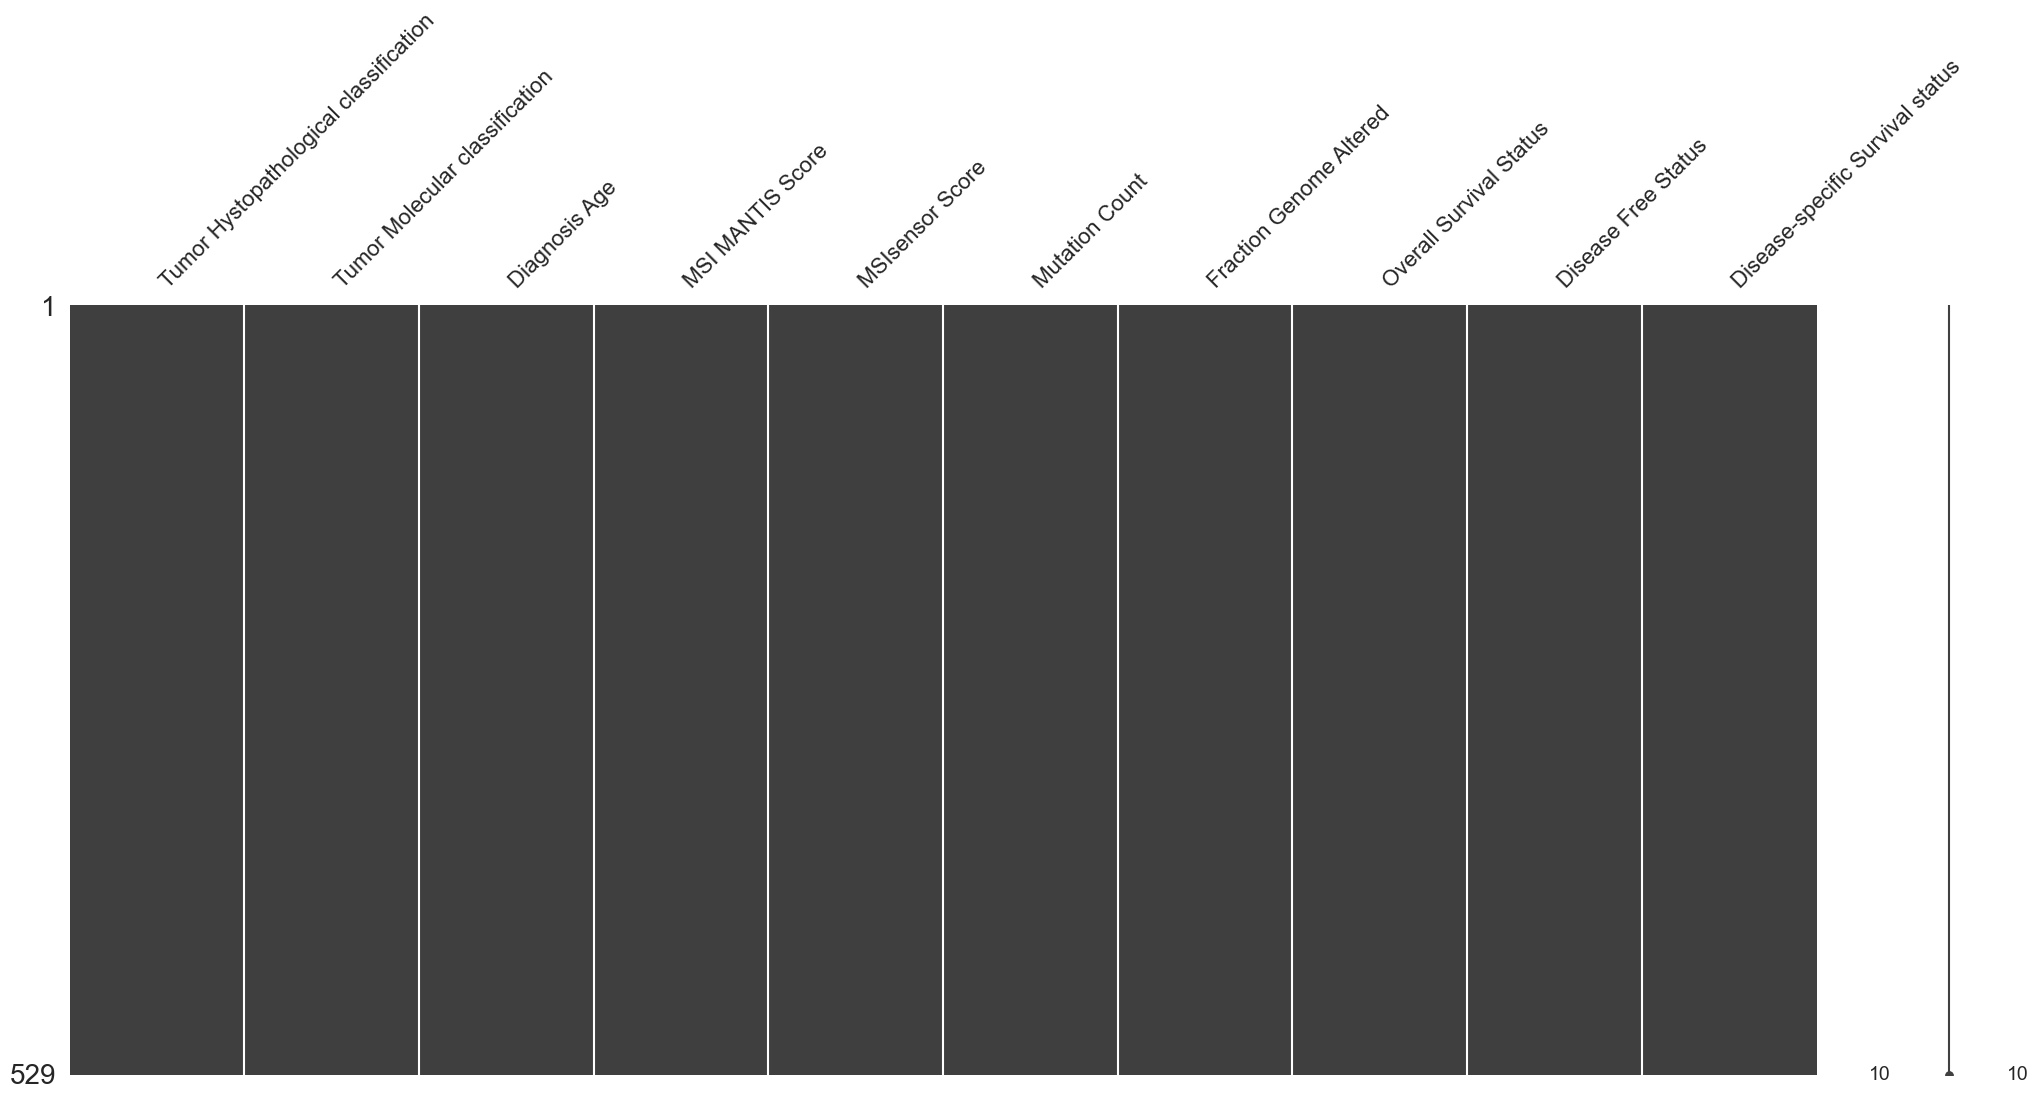

In [28]:
msno.matrix(final_df)
plt.show()

## CHECKING FOR DUPLICATED VALUES

In [29]:
final_df.duplicated().sum()

0

# FEATURE EXPLORATION

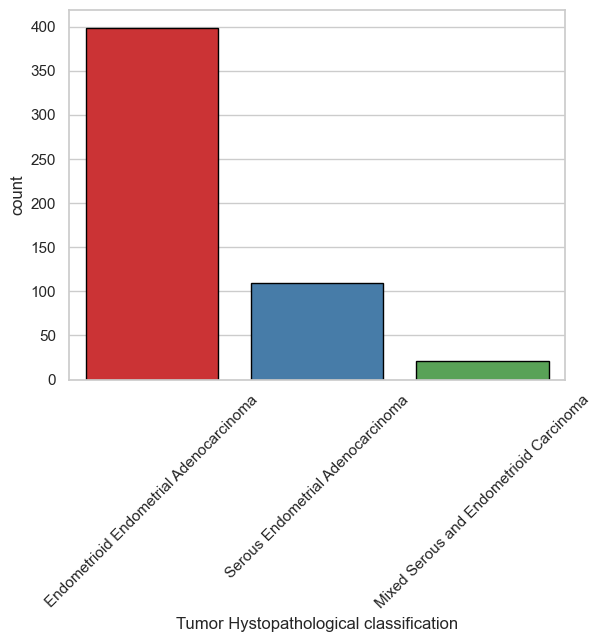

In [30]:
sns.countplot(x='Tumor Hystopathological classification', data=final_df, palette="Set1", edgecolor='black')

plt.xticks(rotation=45)

plt.show()

 __The most frequent subtype found in the sample studied is the Endometroid Carcinoma, followed
    by the Serous Adenocarcinoma and mixed in the last place__

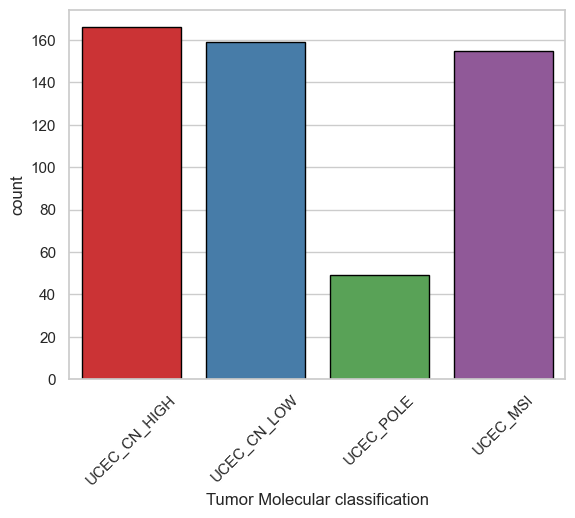

In [31]:
sns.countplot(x='Tumor Molecular classification', data=final_df, palette='Set1', edgecolor='black')

plt.xticks(rotation=45)

plt.show()

__The most frequent molecular subtype found in the sample studied is the UCEC_CN_HIGH (High copy)
followed by UCEC_CN_LOW (Low Copy) and UCEC_MSI (Microsatellite instability)__

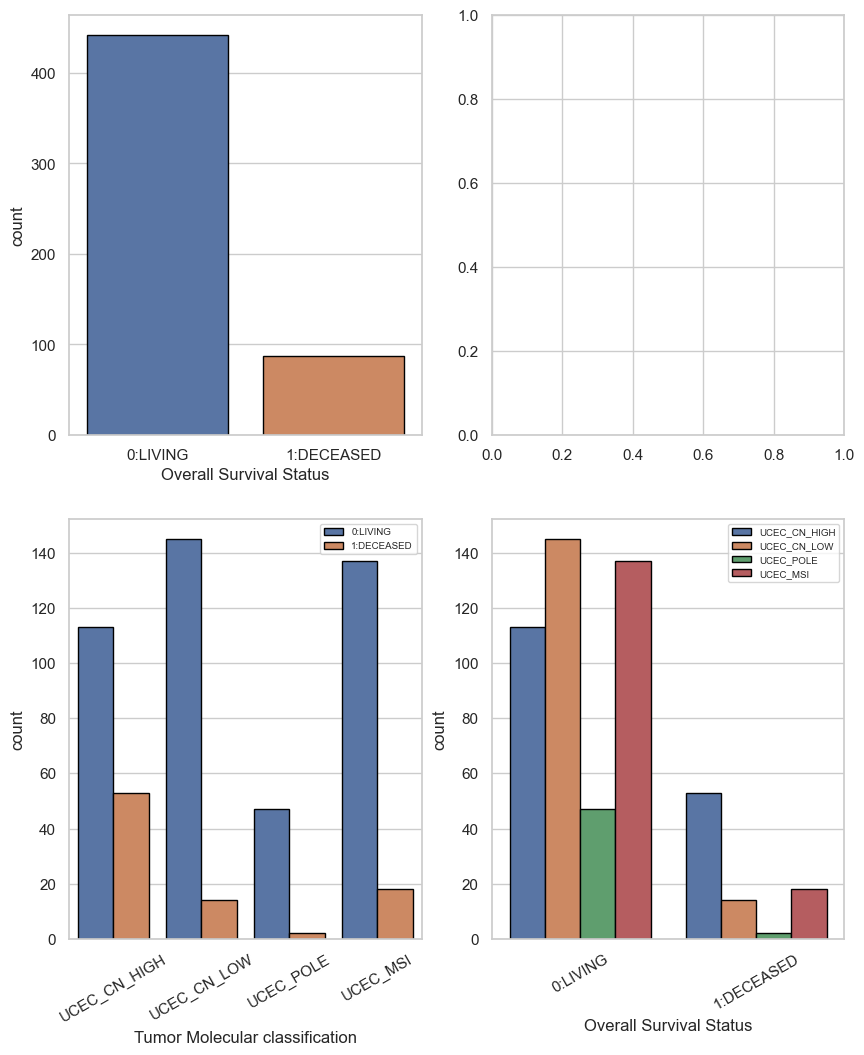

In [32]:
sns.set(style="whitegrid")  

fig,axs = plt.subplots(2,2, figsize = (10, 12))

oss = sns.countplot(x='Overall Survival Status', data=final_df, ax=axs[0, 0], edgecolor='black')

hpc = sns.countplot(x='Tumor Molecular classification', data=final_df, hue='Overall Survival Status', ax=axs[1, 0], edgecolor='black')
hpc.set_xticklabels(hpc.get_xticklabels(), rotation=30)
hpc.legend(loc='upper right', fontsize=7)

tmc = sns.countplot(x='Overall Survival Status', data=final_df, hue='Tumor Molecular classification', ax=axs[1, 1], edgecolor='black')
tmc.legend(loc='upper right', fontsize=7)
tmc.set_xticklabels(tmc.get_xticklabels(), rotation=30)

plt.show()

__UCEC_CN_HIGH, followed by the UCEC_MSI, showed the higher rate of 'deceased' Overall Survival Status,
subtypes related to a bad prognosis of the disease__

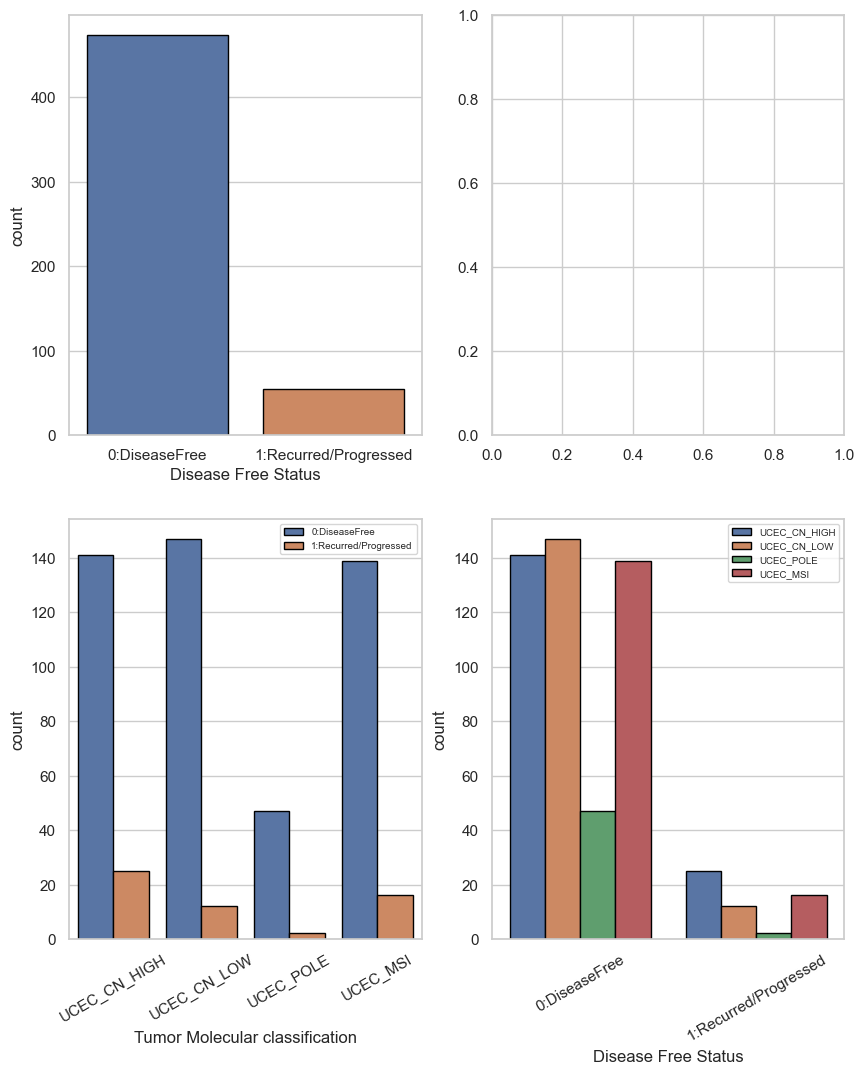

In [33]:
sns.set(style="whitegrid")  

fig,axs = plt.subplots(2,2, figsize = (10, 12))

dfs = sns.countplot(x='Disease Free Status', data=final_df, ax=axs[0, 0], edgecolor='black')

hpc = sns.countplot(x='Tumor Molecular classification', data=final_df, hue='Disease Free Status', ax=axs[1, 0], edgecolor='black')
hpc.set_xticklabels(hpc.get_xticklabels(), rotation=30)
hpc.legend(loc='upper right', fontsize=7)

mc = sns.countplot(x='Disease Free Status', data=final_df, hue='Tumor Molecular classification', ax=axs[1, 1], edgecolor='black')
mc.legend(loc='upper right', fontsize=7)
mc.set_xticklabels(mc.get_xticklabels(), rotation=30)

plt.show()

__UCEC_CN_HIGH, followed by the UCEC_MSI showed the higher rate of recurrence/progression of the disease of all molecular variants__

In [34]:
molecular_profile = final_df.groupby('Tumor Molecular classification')[['MSI MANTIS Score','MSIsensor Score','Mutation Count','Fraction Genome Altered']].mean()

In [35]:
molecular_profile

,MSI MANTIS Score,MSIsensor Score,Mutation Count,Fraction Genome Altered
Tumor Molecular classification,,,,
UCEC_CN_HIGH,0.307517,0.580482,70.668675,0.438317
UCEC_CN_LOW,0.288209,0.367642,75.534591,0.085381
UCEC_MSI,0.760813,19.922645,982.716129,0.062350
UCEC_POLE,0.347382,2.747755,7426.734694,0.024290


__UCEC_CN_HIGH ----> MSI MANTIS Score: +  MSIsensor Score: + Mutation Count : + Fraction Genome Altered : +++__

__UCEC_CN_LOW ----> MSI MANTIS Score: +  MSIsensor Score: + Mutation Count : + Fraction Genome Altered : ++__

__UCEC_MSI ----> MSI MANTIS Score: +++  MSIsensor Score: +++ Mutation Count : + Fraction Genome Altered : +__

__UCEC_POLE ----> MSI MANTIS Score: +  MSIsensor Score: + Mutation Count : +++ Fraction Genome Altered : ++__

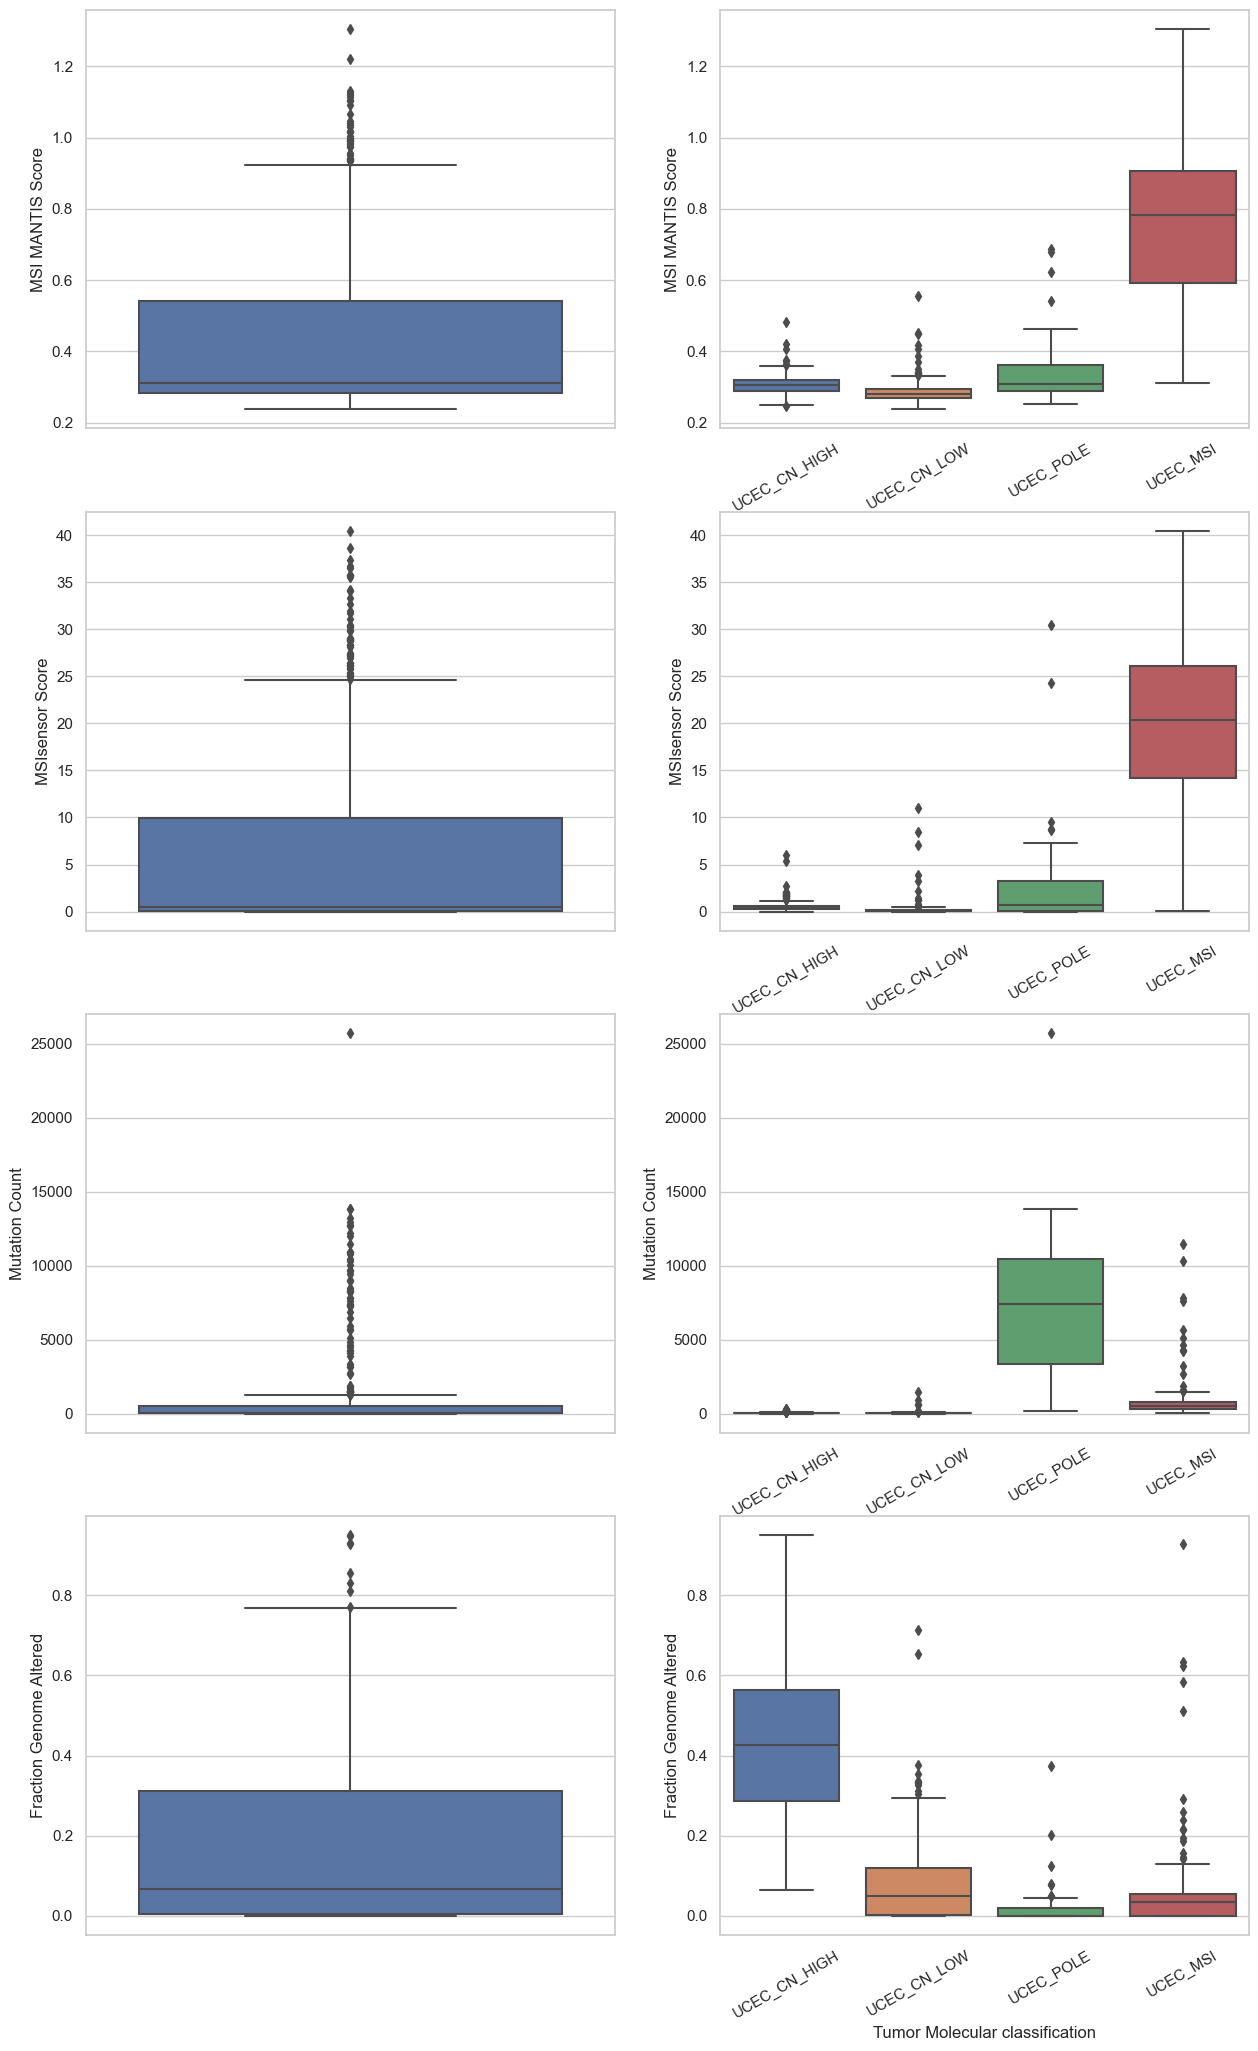

In [36]:
sns.set(style="whitegrid")  

fig,axs = plt.subplots(4,2, figsize = (15, 25))

sns.boxplot(y='MSI MANTIS Score', data=final_df, ax=axs[0, 0])
msimantiss = sns.boxplot(y='MSI MANTIS Score', x='Tumor Molecular classification', data=final_df, ax=axs[0, 1])
msimantiss.set_xticklabels(msimantiss.get_xticklabels(), rotation=30)

sns.boxplot(y='MSIsensor Score', data=final_df, ax=axs[1, 0])
msisensors = sns.boxplot(y='MSIsensor Score', x='Tumor Molecular classification', data=final_df, ax=axs[1, 1])
msisensors.set_xticklabels(msisensors.get_xticklabels(), rotation=30)

sns.boxplot(y='Mutation Count', data=final_df, ax=axs[2, 0])
mc = sns.boxplot(y='Mutation Count', x='Tumor Molecular classification', data=final_df, ax=axs[2, 1])
mc.set_xticklabels(mc.get_xticklabels(), rotation=30)


sns.boxplot(y='Fraction Genome Altered', data=final_df, ax=axs[3, 0])
fga = sns.boxplot(y='Fraction Genome Altered', x='Tumor Molecular classification', data=final_df, ax=axs[3, 1])
fga.set_xticklabels(fga.get_xticklabels(), rotation=30)

plt.show()

__UCEC_MSI showed the higher MSI Mantis Score and MSI sensor score of all the molecular variants, explained
by its high genetic microsattelite instability__

__UCEC_POLE showed the highest mutation count characterizing the hypermutation of this variant, specially in the POLE exonuclease domain__

__UCEC_HIGH showed the highest fraction of the genome altered, followed by UCEC_LOW__

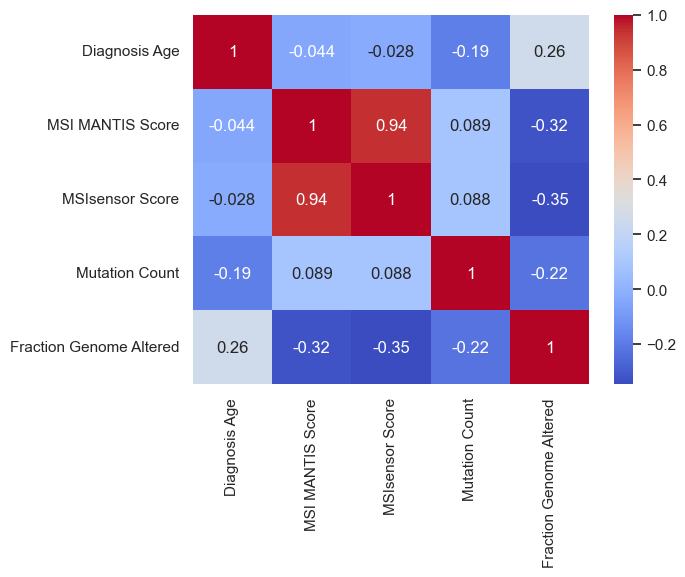

In [37]:

sns.heatmap(final_df.corr(), annot=True, cmap='coolwarm')

plt.show()

<AxesSubplot:xlabel='MSIsensor Score', ylabel='MSI MANTIS Score'>

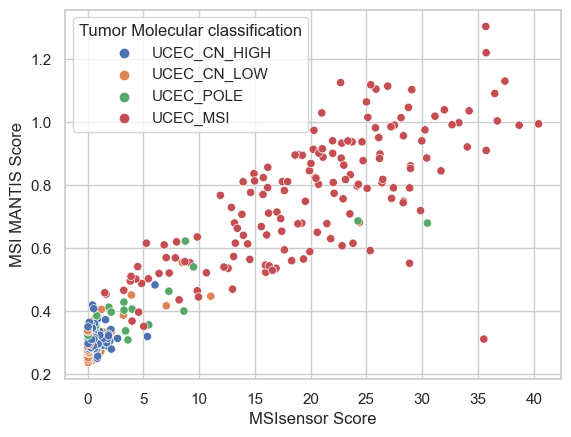

In [38]:
sns.scatterplot(data=final_df, x='MSIsensor Score', y='MSI MANTIS Score', hue='Tumor Molecular classification')

<AxesSubplot:xlabel='MSI MANTIS Score', ylabel='Mutation Count'>

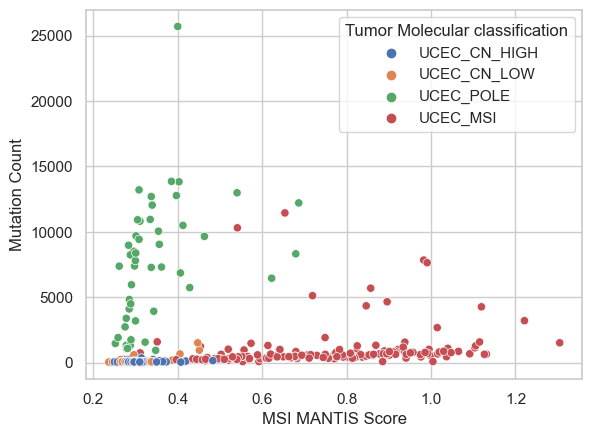

In [39]:
sns.scatterplot(data=final_df, x='MSI MANTIS Score', y='Mutation Count', hue='Tumor Molecular classification')

<AxesSubplot:xlabel='MSI MANTIS Score', ylabel='Fraction Genome Altered'>

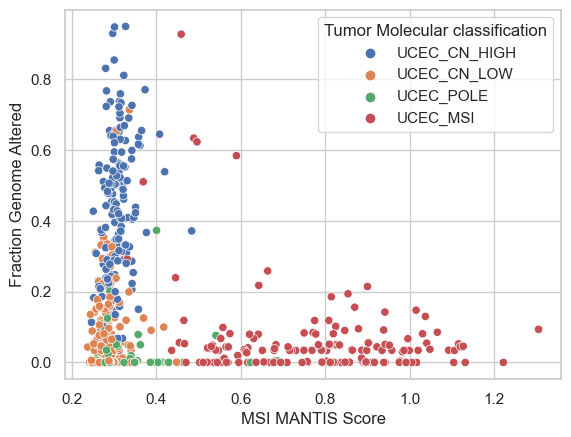

In [40]:
sns.scatterplot(data=final_df, y='Fraction Genome Altered', x='MSI MANTIS Score', hue='Tumor Molecular classification')

<AxesSubplot:xlabel='Mutation Count', ylabel='Fraction Genome Altered'>

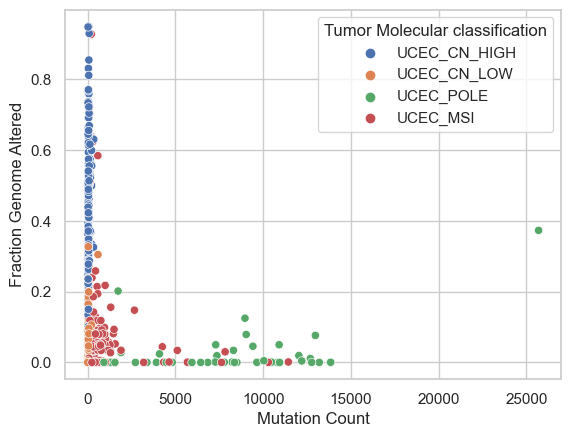

In [41]:
sns.scatterplot(data=final_df, x='Mutation Count', y='Fraction Genome Altered', hue='Tumor Molecular classification')

__There is a strong positive linear relationship between MSI sensor score and MSI Mantis score, both defined by the grade of microsatellite instability__

__It seems to be a slight positive association between MSI sensor score and the Mutation Count__

# CREATING A CLASSIFICATION MODEL TO PREDICT THE MOLECULAR SUBTYPE BASED ON GENETIC CHARACTERISTICS

## Defining features variables and target variable

In [42]:
X = final_df[['Mutation Count', 'Fraction Genome Altered', 'MSI MANTIS Score', 'MSIsensor Score']]

y = final_df['Tumor Molecular classification']

## Normalizing numerical features with MinMaxScaler, considering they followed skewed distributions with outliers as being normal part of the dataset

In [43]:
scaler = MinMaxScaler()

In [44]:
X_scaled = scaler.fit_transform(X)

X_scaled = pd.DataFrame(X_scaled, columns=['Mutation Count', 'Fraction Genome Altered', 'MSI MANTIS Score', 'MSIsensor Score'])

X_scaled.head()

,Mutation Count,Fraction Genome Altered,MSI MANTIS Score,MSIsensor Score
0,0.002258,0.349004,0.080906,0.021024
1,0.005450,0.035944,0.096076,0.000247
2,0.001479,0.727627,0.091207,0.013604
3,0.001674,0.061242,0.077629,0.002226
4,0.420452,0.000105,0.069108,0.043037


## Splitting into training and test set

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=100)

## Class balancing of the target variable due existing of minority subclasses, mainly UCEC_POLE, using oversampling with SMOTE algorithm in the train set

In [46]:
"""Instanciate a SMOTE class and oversampling the train set"""

counter = Counter(y_train)
print('Before', ':', counter)

sm = SMOTE()
X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train)

counter = Counter(y_train_sm)
print('After', ':', counter)

Before : Counter({'UCEC_MSI': 114, 'UCEC_CN_HIGH': 112, 'UCEC_CN_LOW': 111, 'UCEC_POLE': 33})
After : Counter({'UCEC_MSI': 114, 'UCEC_CN_LOW': 114, 'UCEC_CN_HIGH': 114, 'UCEC_POLE': 114})


## Hyperparamater tuning and crossvalidating of KNN model 

In [47]:
model = KNeighborsClassifier()

grid = {
    'n_neighbors': np.arange(2, 30)
        }

search = GridSearchCV(model, grid, scoring='accuracy', cv=5, n_jobs=-1)
search.fit(X_train_sm, y_train_sm)

search.best_params_

{'n_neighbors': 4}

## Instanciating, fitting the model and predicting with the optimized parameter

In [48]:
knn_model = KNeighborsClassifier(n_neighbors=4)

knn_model.fit(X_train_sm, y_train_sm)

KNeighborsClassifier(n_neighbors=4)

In [49]:
y_pred = knn_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred) * 100


accuracy

69.81132075471697